In [1]:
!wget https://www.gutenberg.org/cache/epub/228/pg228.txt

--2024-09-17 05:41:24--  https://www.gutenberg.org/cache/epub/228/pg228.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 746807 (729K) [text/plain]
Saving to: ‘pg228.txt’

pg228.txt           100%[===================>] 729.30K  4.63MB/s    in 0.2s    

2024-09-17 05:41:24 (4.63 MB/s) - ‘pg228.txt’ saved [746807/746807]



In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Copy your file path, to open and read the file

(make sure the file is uploaded everytime you open colab)

In [3]:
# read the text file (merchant of venice) saved in mov.txt
path = '/content/pg228.txt'
with open(f'{path}', 'r') as f:
    text = f.read()

## Part - 1

### a. Pick your top characters and list them

In [82]:
characters = [
    "Aeneas",            # The Trojan hero and protagonist of the epic
    "Dido",              # The queen of Carthage who falls in love with Aeneas
    "Turnus",            # The Rutulian leader and Aeneas's chief antagonist
    "Juno",              # The queen of the gods who opposes Aeneas
    "Venus",             # The goddess of love and Aeneas's mother
    "Jupiter",           # The king of the gods
    "Neptune",           # The god of the sea
    "Mercury",           # The messenger of the gods
    "Ascanius",          # Aeneas's son
    "Anchises",          # Aeneas's father
    "Creusa",            # Aeneas's wife, who dies during the fall of Troy
    "Priam",             # The king of Troy
    "Hector",            # A Trojan prince and warrior, killed by Achilles
    "Achilles",          # The Greek hero whose ghost appears in the underworld
    "Amata",             # The wife of Latinus and mother of Lavinia
    "Lavinia",           # The daughter of Latinus, whom Aeneas marries
    "Latinus",           # The king of the Latins and father of Lavinia
    "Pallas",            # The young ally of Aeneas, killed by Turnus
    "Evander",           # The king of Pallanteum, an ally of Aeneas
    "Camilla",           # The warrior queen of the Volscians, allied with Turnus
    "Nisus",             # A Trojan warrior who undertakes a dangerous mission
    "Euryalus",          # Nisus's companion, who also participates in the mission
    "Tarchon",           # An ally of Aeneas, leader of the Etruscans
    "Sergestus",         # A minor Trojan figure who aids Aeneas
]


# replace the names of characters with the names in the list (Duke of Venice --> Duke_of_Venice)
for i in range(len(characters)):
    text = text.replace(characters[i], characters[i].replace(' ', '_'))

# split the text into sentences
sentences = text.split('.')

# remove the last element of the list as it is empty
sentences = sentences[:-1]

### b. Forming the graph

In [83]:
# using co-occurrence algorithm to find the co-occurrence of characters in the sentences
co_occurrence = []

for i in range(len(sentences)):
    for j in range(len(characters)):
        if characters[j] in sentences[i]:
            for k in range(len(characters)):
                if characters[k] in sentences[i] and characters[j] != characters[k]:
                    co_occurrence.append((characters[j], characters[k]))

# create a graph
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(characters)

# add edges to the graph
G.add_edges_from(co_occurrence)

# find number of nodes and edges
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

# summary of the graph
print(str(G))

Number of nodes: 24
Number of edges: 68
Graph with 24 nodes and 68 edges


In [84]:
# write the graph to a file
nx.write_gexf(G, 'graph.gexf')

# save preprocessed text to a file (you can preprocess differently if you want/need to)
with open(f'preprocessed.txt', 'w') as f:
    f.write(text)

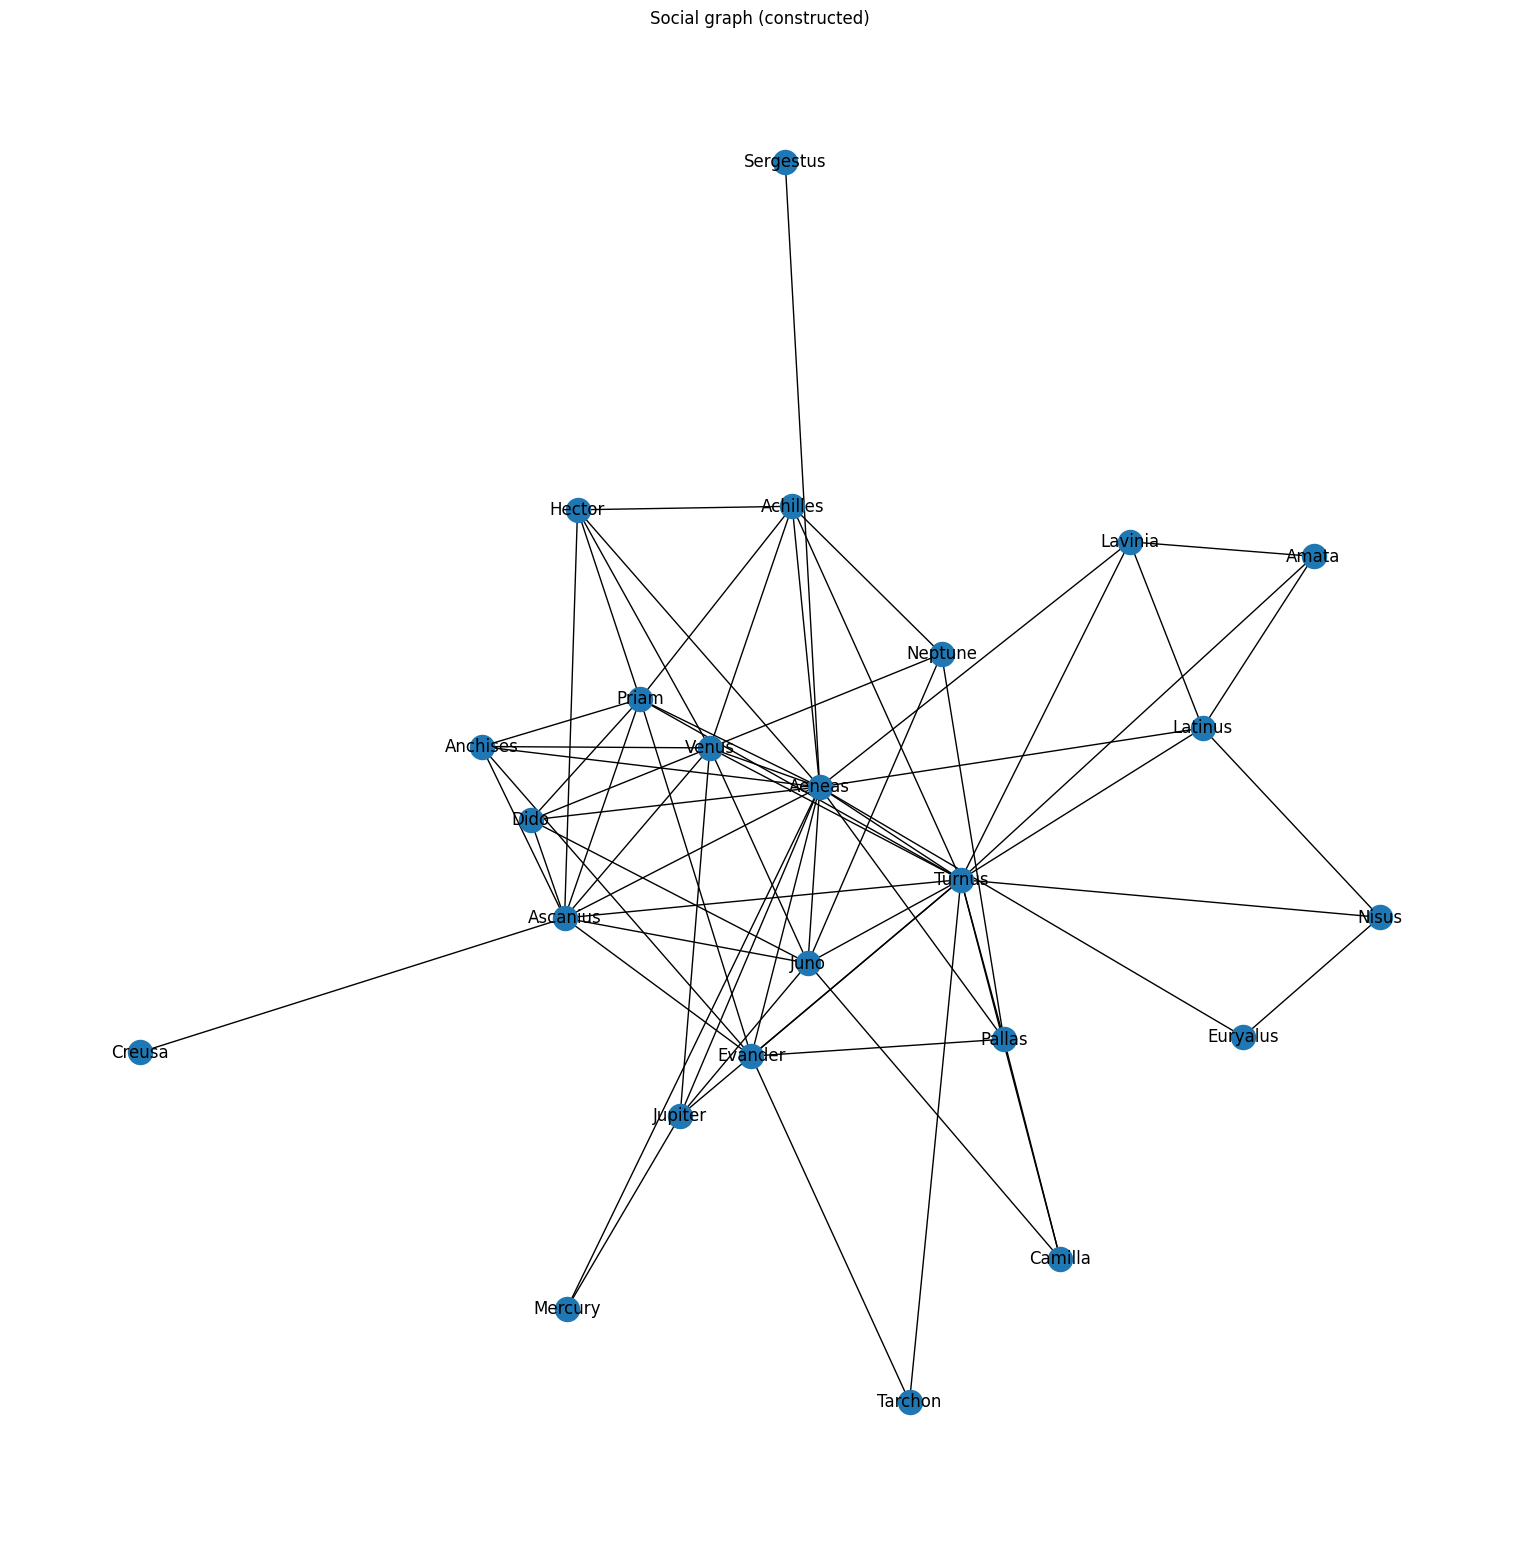

In [85]:
# view graph
plt.figure(figsize=(15, 15))
nx.draw(G, with_labels=True)
plt.title("Social graph (constructed)")
plt.show()

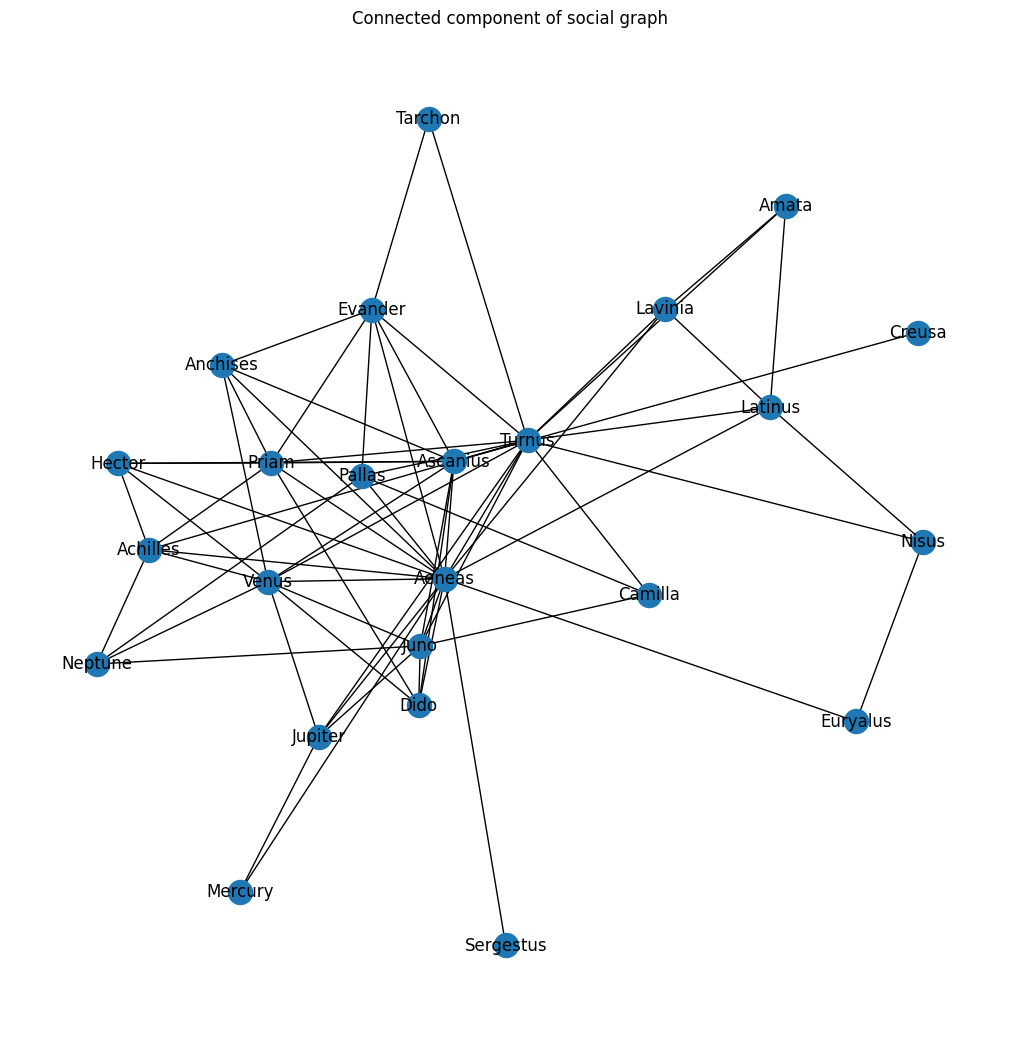

In [86]:
# Get largest connected component
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph containing only the largest connected component
G_connected = G.subgraph(largest_cc).copy()

# view graph clearly
plt.figure(figsize=(10, 10))
nx.draw(G_connected, with_labels=True)
plt.title("Connected component of social graph")
plt.show()

calculate graph metrics using Networkx API

example:

### c. Centrality

In [87]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Aeneas': 0.7391304347826086,
 'Dido': 0.21739130434782608,
 'Turnus': 0.6521739130434783,
 'Juno': 0.34782608695652173,
 'Venus': 0.43478260869565216,
 'Jupiter': 0.21739130434782608,
 'Neptune': 0.17391304347826086,
 'Mercury': 0.08695652173913043,
 'Ascanius': 0.43478260869565216,
 'Anchises': 0.21739130434782608,
 'Creusa': 0.043478260869565216,
 'Priam': 0.34782608695652173,
 'Hector': 0.21739130434782608,
 'Achilles': 0.2608695652173913,
 'Amata': 0.13043478260869565,
 'Lavinia': 0.17391304347826086,
 'Latinus': 0.21739130434782608,
 'Pallas': 0.21739130434782608,
 'Evander': 0.30434782608695654,
 'Camilla': 0.13043478260869565,
 'Nisus': 0.13043478260869565,
 'Euryalus': 0.08695652173913043,
 'Tarchon': 0.08695652173913043,
 'Sergestus': 0.043478260869565216}

In [88]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'Aeneas': 0.35196687370600416,
 'Dido': 0.0015527950310559005,
 'Turnus': 0.2795815295815296,
 'Juno': 0.04516751364577451,
 'Venus': 0.05163121902252336,
 'Jupiter': 0.01212121212121212,
 'Neptune': 0.004611330698287219,
 'Mercury': 0.0,
 'Ascanius': 0.10845410628019325,
 'Anchises': 0.0015527950310559005,
 'Creusa': 0.0,
 'Priam': 0.019703243616287093,
 'Hector': 0.0021456804065499717,
 'Achilles': 0.018700985005332828,
 'Amata': 0.0,
 'Lavinia': 0.006107660455486543,
 'Latinus': 0.016167890080933556,
 'Pallas': 0.023693456302151954,
 'Evander': 0.030839450404667793,
 'Camilla': 0.0009881422924901185,
 'Nisus': 0.007839262187088273,
 'Euryalus': 0.005317146621494447,
 'Tarchon': 0.0,
 'Sergestus': 0.0}

In [89]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'Aeneas': 0.7931034482758621,
 'Dido': 0.5227272727272727,
 'Turnus': 0.7419354838709677,
 'Juno': 0.6052631578947368,
 'Venus': 0.6388888888888888,
 'Jupiter': 0.5476190476190477,
 'Neptune': 0.45098039215686275,
 'Mercury': 0.46,
 'Ascanius': 0.6388888888888888,
 'Anchises': 0.5227272727272727,
 'Creusa': 0.39655172413793105,
 'Priam': 0.6052631578947368,
 'Hector': 0.5111111111111111,
 'Achilles': 0.5609756097560976,
 'Amata': 0.45098039215686275,
 'Lavinia': 0.5227272727272727,
 'Latinus': 0.5348837209302325,
 'Pallas': 0.5476190476190477,
 'Evander': 0.5897435897435898,
 'Camilla': 0.46938775510204084,
 'Nisus': 0.46,
 'Euryalus': 0.46938775510204084,
 'Tarchon': 0.45098039215686275,
 'Sergestus': 0.45098039215686275}

In [90]:
pagerank = nx.pagerank(G)
pagerank

{'Aeneas': 0.11830890493310475,
 'Dido': 0.0353566921818827,
 'Turnus': 0.10325315075091433,
 'Juno': 0.055248706812103414,
 'Venus': 0.06655525697062413,
 'Jupiter': 0.03741755005640534,
 'Neptune': 0.030048216929901526,
 'Mercury': 0.01852625725146767,
 'Ascanius': 0.06974628896630157,
 'Anchises': 0.035531188009320765,
 'Creusa': 0.012178339201498908,
 'Priam': 0.05398371694324316,
 'Hector': 0.035410145539881394,
 'Achilles': 0.04181409104765308,
 'Amata': 0.025692943722456965,
 'Lavinia': 0.03207244771773261,
 'Latinus': 0.03985808077682806,
 'Pallas': 0.03733639138025911,
 'Evander': 0.04977995769824824,
 'Camilla': 0.024318554877930332,
 'Nisus': 0.027340349374716584,
 'Euryalus': 0.01991163501323557,
 'Tarchon': 0.01814579943087529,
 'Sergestus': 0.012165334413414438}

## d. Ego network and local clustering coefficient

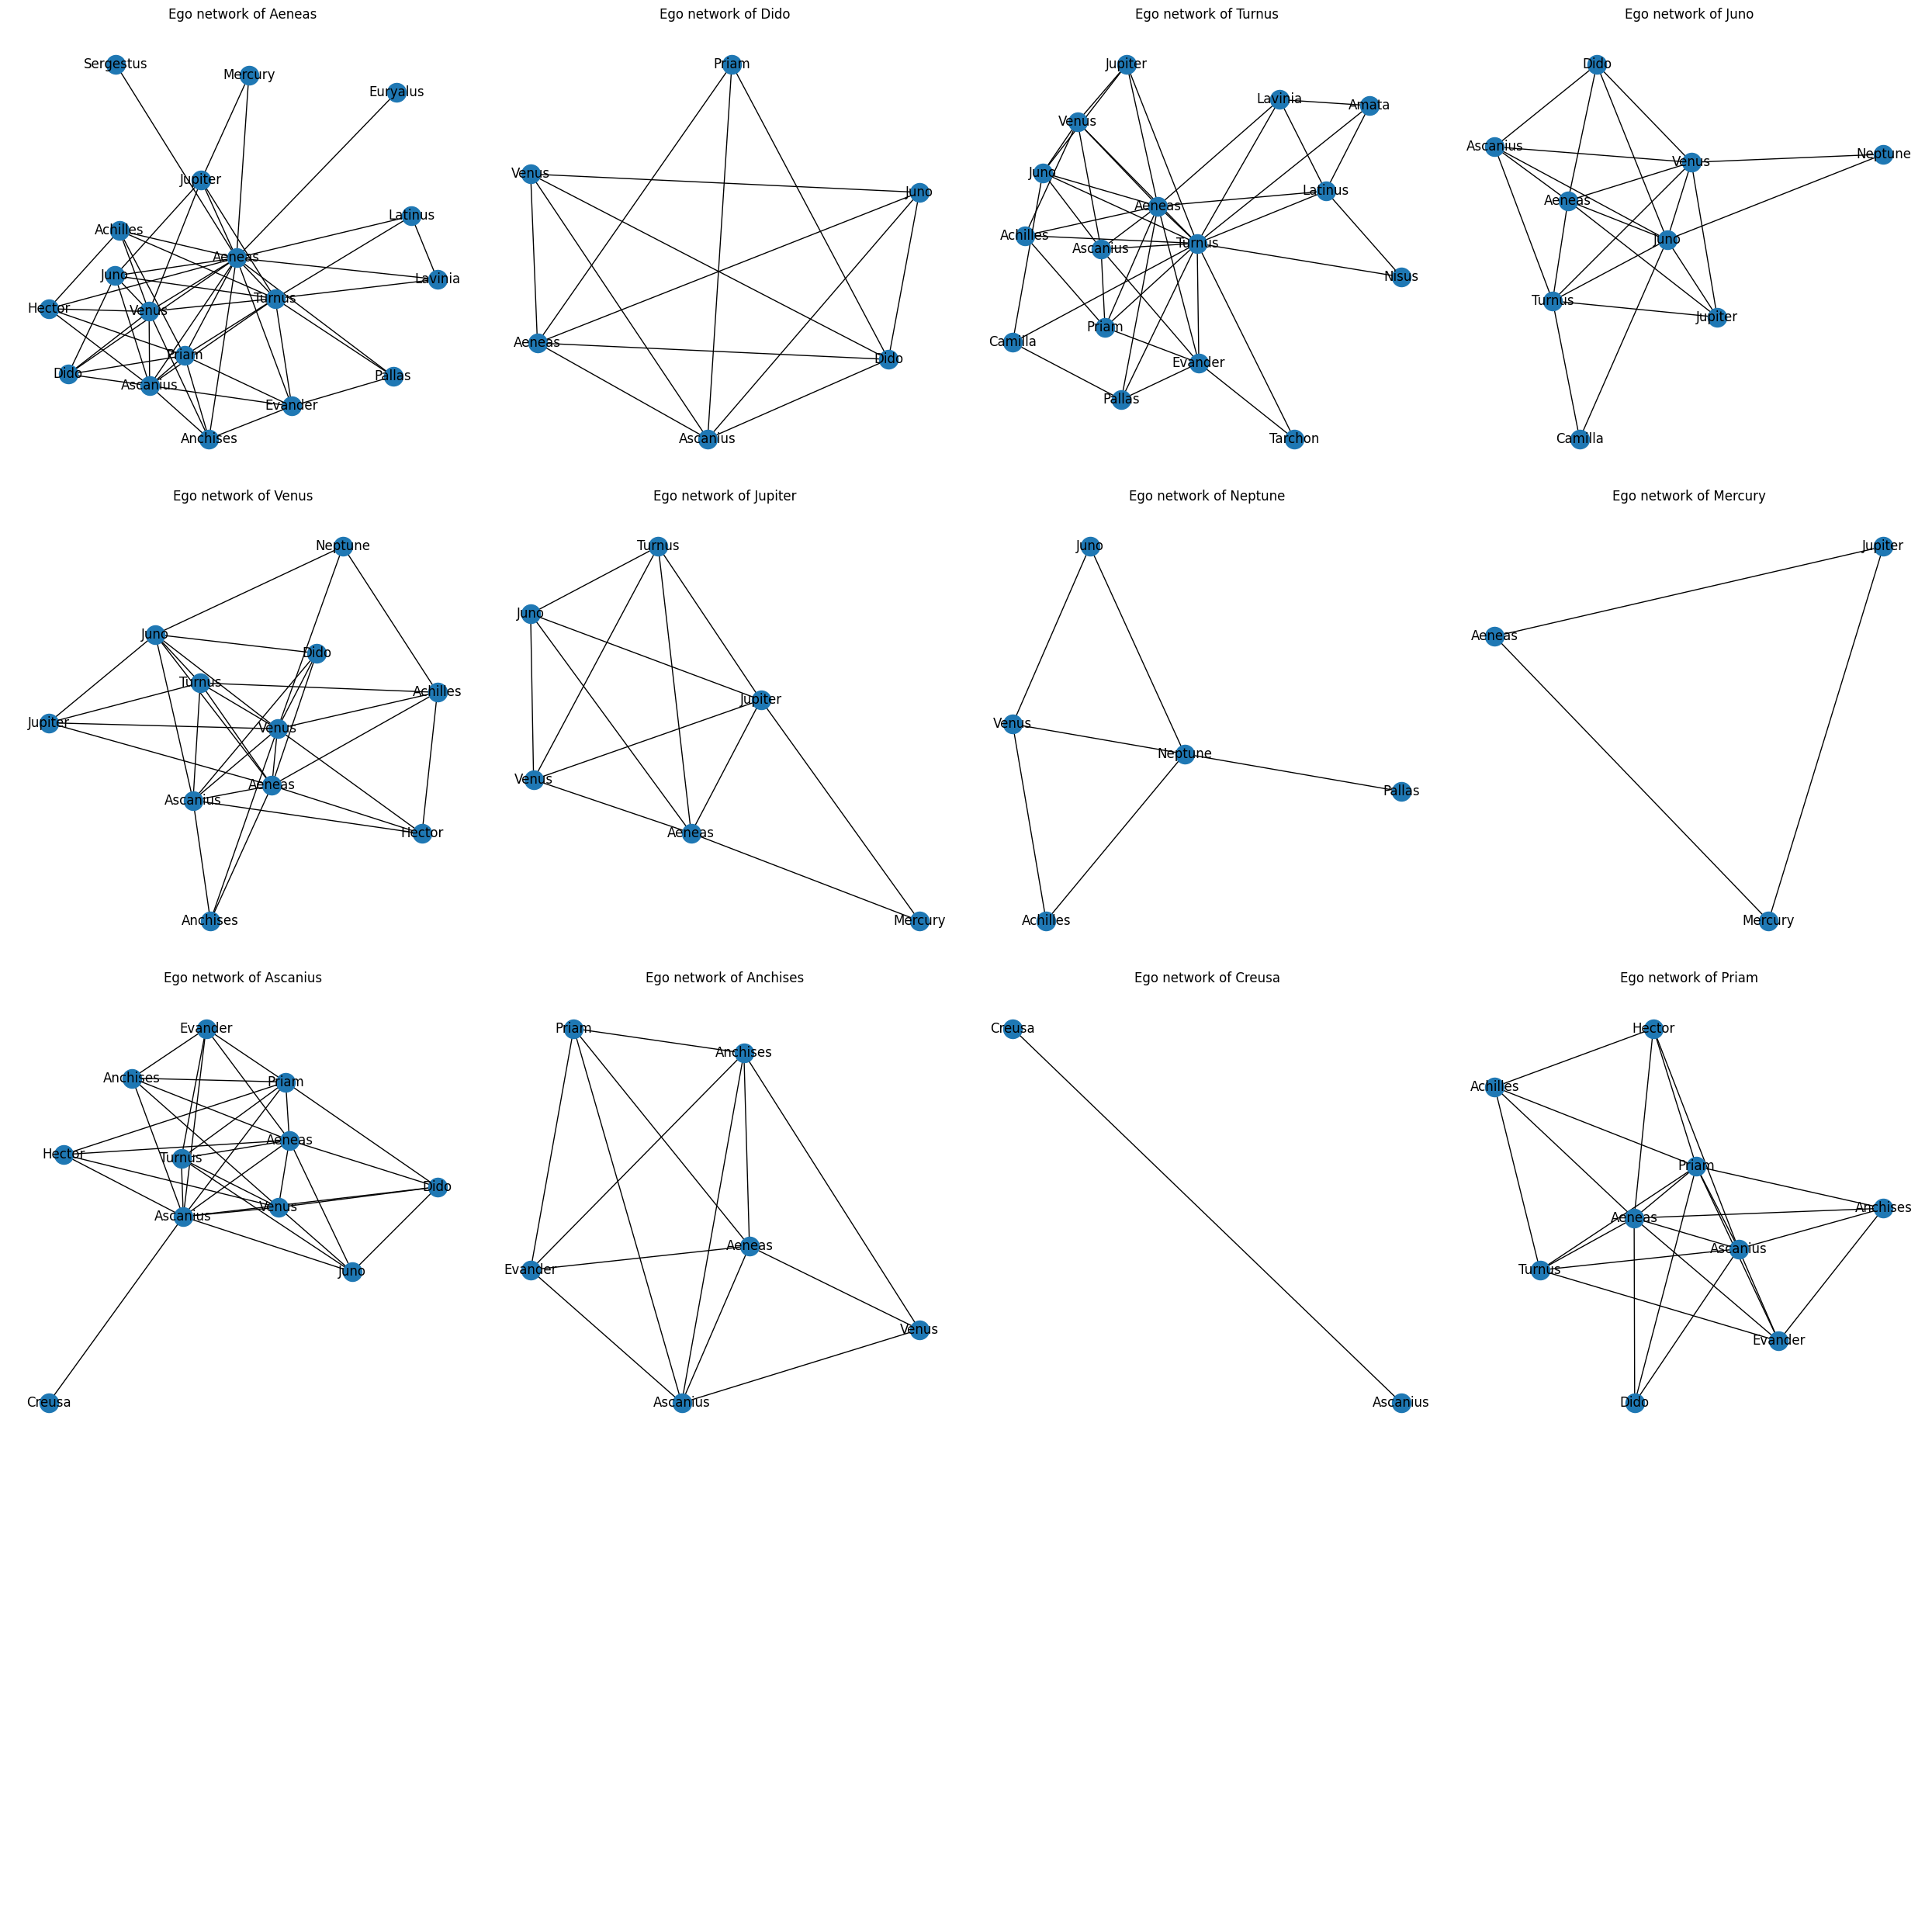

In [91]:
import matplotlib.pyplot as plt
import networkx as nx

main_characters = ['Aeneas', 'Dido', 'Turnus', 'Juno', 'Venus', 'Jupiter',
                   'Neptune', 'Mercury', 'Ascanius', 'Anchises', 'Creusa',
                    'Priam']

fig, axes = plt.subplots(4, 4, figsize=(25, 25))
axes = axes.flatten()

local_clustering_coefficients = {}
for i, char in enumerate(main_characters):
    ego_graph = nx.ego_graph(G, char)
    nx.draw(ego_graph, with_labels=True, ax=axes[i])
    axes[i].set_title(f"Ego network of {char}")
    local_clustering_coefficients[char] = nx.clustering(ego_graph)


for i in range(len(main_characters), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [92]:
for i in local_clustering_coefficients:
    print(f"Local clustering coefficient of {i}: {local_clustering_coefficients[i]}")

Local clustering coefficient of Aeneas: {'Aeneas': 0.25735294117647056, 'Dido': 0.8, 'Turnus': 0.4, 'Juno': 0.8, 'Venus': 0.5277777777777778, 'Jupiter': 0.7, 'Mercury': 1.0, 'Ascanius': 0.6111111111111112, 'Anchises': 0.8, 'Priam': 0.5714285714285714, 'Hector': 0.8, 'Achilles': 0.8, 'Lavinia': 1.0, 'Latinus': 1.0, 'Pallas': 1.0, 'Evander': 0.7333333333333333, 'Euryalus': 0, 'Sergestus': 0}
Local clustering coefficient of Dido: {'Juno': 1.0, 'Aeneas': 0.8, 'Priam': 1.0, 'Ascanius': 0.8, 'Venus': 1.0, 'Dido': 0.8}
Local clustering coefficient of Turnus: {'Aeneas': 0.4, 'Turnus': 0.26666666666666666, 'Juno': 0.6666666666666666, 'Venus': 0.7333333333333333, 'Jupiter': 1.0, 'Ascanius': 0.7333333333333333, 'Priam': 0.8, 'Achilles': 0.8333333333333334, 'Amata': 1.0, 'Lavinia': 0.8333333333333334, 'Latinus': 0.6, 'Pallas': 0.6666666666666666, 'Evander': 0.6, 'Camilla': 0.6666666666666666, 'Nisus': 1.0, 'Tarchon': 1.0}
Local clustering coefficient of Juno: {'Juno': 0.5, 'Aeneas': 0.8, 'Camilla'

## f. Generative Models

#### BA preferential attachment

In [93]:
avg_degree = sum(dict(G.degree()).values()) / len(G.nodes())
avg_degree

5.666666666666667

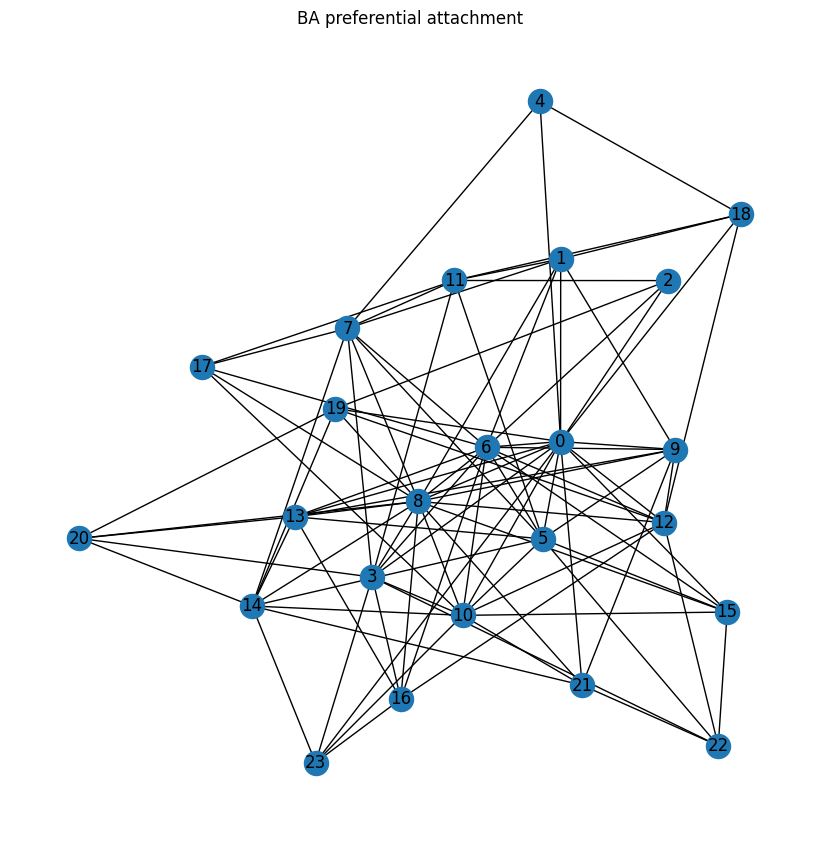

In [94]:
ba_pa = nx.barabasi_albert_graph(len(G.nodes()), int(avg_degree))
plt.figure(figsize=(8, 8))
nx.draw(ba_pa, with_labels=True)
plt.title("BA preferential attachment")
plt.show()

Text(0.5, 1.0, 'Random graph')

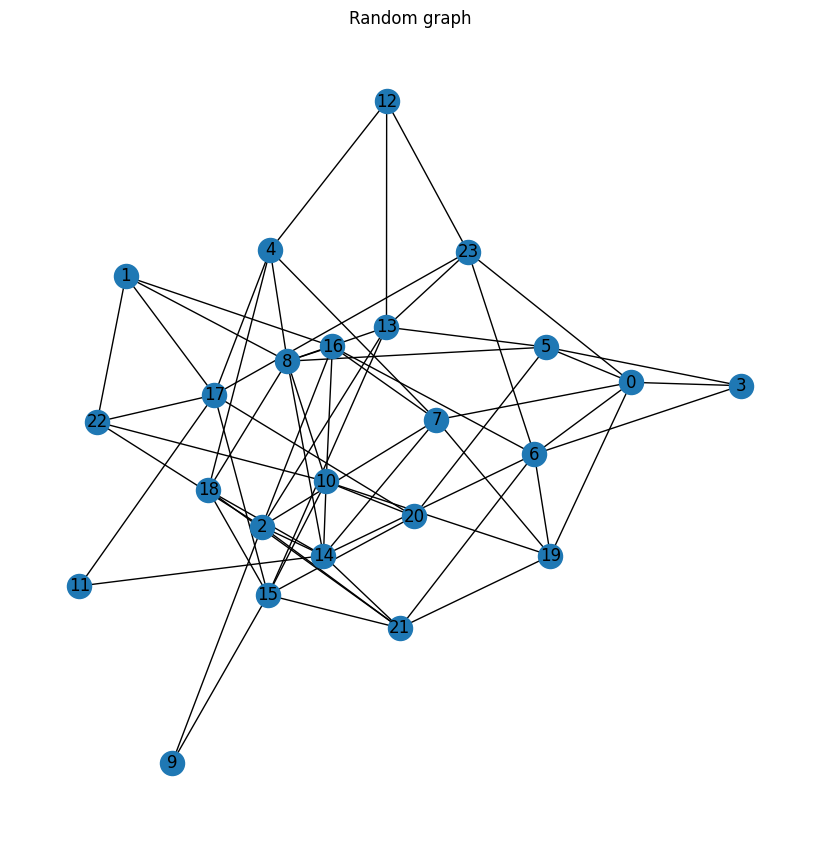

In [95]:
random_graph = nx.erdos_renyi_graph(len(G.nodes()), avg_degree/len(G.nodes()))
plt.figure(figsize=(8, 8))
nx.draw(random_graph, with_labels=True)
plt.title("Random graph")

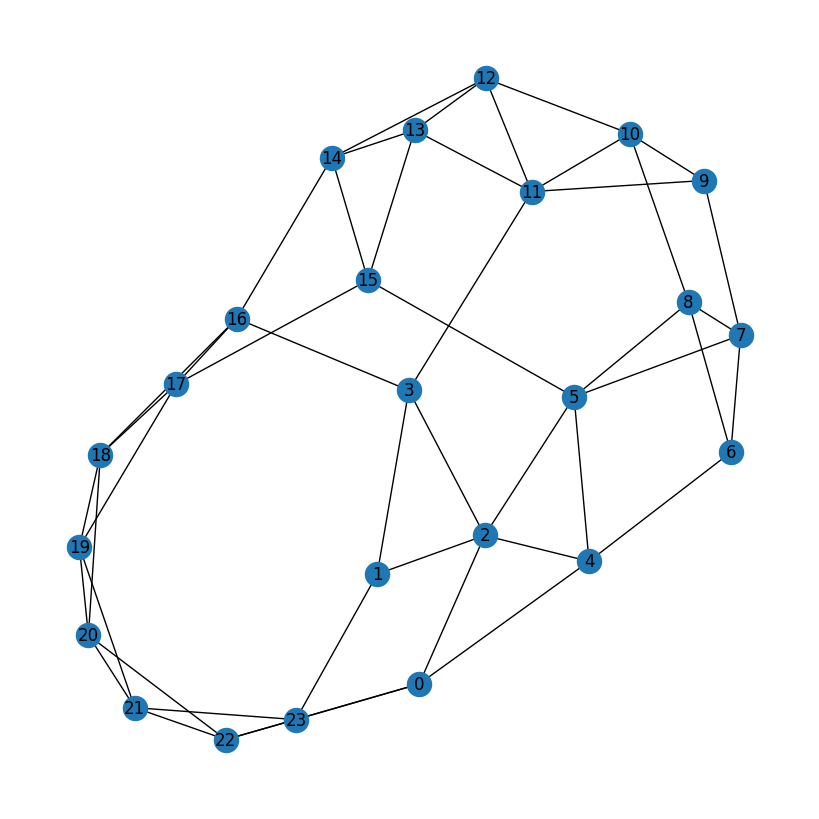

In [96]:
small_world = nx.watts_strogatz_graph(len(G.nodes()), int(avg_degree), 0.1)
plt.figure(figsize=(8, 8))
nx.draw(small_world, with_labels=True)
plt.show()

In [97]:
def compare(g1, g2):
    print(f"Number of nodes: {len(g1.nodes())} vs {len(g2.nodes())}")
    print(f"Number of edges: {len(g1.edges())} vs {len(g2.edges())}")
    print(f"Average degree: {sum(dict(g1.degree()).values()) / len(g1.nodes())} vs {sum(dict(g2.degree()).values()) / len(g2.nodes())}")
    print(f"Clustering coefficient: {nx.average_clustering(g1)} vs {nx.average_clustering(g2)}")
    print(f"Transitivity: {nx.transitivity(g1)} vs {nx.transitivity(g2)}")
    # try:
    print(f"Average shortest path length: {nx.average_shortest_path_length(g1)} vs {nx.average_shortest_path_length(g2)}")
    print(f"Diameter: {nx.diameter(g1)} vs {nx.diameter(g2)}")
    print(f"Radius: {nx.radius(g1)} vs {nx.radius(g2)}")
    # except:
      # print("graph is not fully connected")
    print(f"Number of connected components: {nx.number_connected_components(g1)} vs {nx.number_connected_components(g2)}")
    print(f"Number of triangles: {nx.triangles(g1)} vs {nx.triangles(g2)}")


In [98]:
d = {"preferential attachment" : ba_pa, "random" : random_graph, "small world" : small_world}
for i in d:
    print(i)
    compare(G, d[i])
    print()

preferential attachment
Number of nodes: 24 vs 24
Number of edges: 68 vs 95
Average degree: 5.666666666666667 vs 7.916666666666667
Clustering coefficient: 0.5412124572051042 vs 0.4299398518148518
Transitivity: 0.42011834319526625 vs 0.4044943820224719
Average shortest path length: 1.9057971014492754 vs 1.6884057971014492
Diameter: 3 vs 3
Radius: 2 vs 2
Number of connected components: 1 vs 1
Number of triangles: {'Aeneas': 35, 'Dido': 8, 'Turnus': 28, 'Juno': 14, 'Venus': 21, 'Jupiter': 7, 'Neptune': 2, 'Mercury': 1, 'Ascanius': 22, 'Anchises': 8, 'Creusa': 0, 'Priam': 16, 'Hector': 8, 'Achilles': 9, 'Amata': 3, 'Lavinia': 5, 'Latinus': 6, 'Pallas': 4, 'Evander': 12, 'Camilla': 2, 'Nisus': 1, 'Euryalus': 0, 'Tarchon': 1, 'Sergestus': 0} vs {0: 38, 1: 11, 2: 2, 3: 15, 4: 1, 5: 17, 6: 38, 7: 14, 8: 45, 9: 17, 10: 25, 11: 5, 12: 14, 13: 15, 14: 13, 15: 10, 16: 8, 17: 6, 18: 4, 19: 7, 20: 6, 21: 7, 22: 1, 23: 5}

random
Number of nodes: 24 vs 24
Number of edges: 68 vs 64
Average degree: 5.6

## Part - 2

### Analysis